# Import библиотек

In [ ]:
!pip install  datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 902.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d1912a1bbb46346a917bc3e6833b739c964661764443e7321f9a55f13d95b0a1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import torch
from tqdm import tqdm
import pandas as pd
import numpy as np
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
import datasets

In [ ]:
tqdm.pandas()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Набор данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sport.csv')
data = data.drop('oid',axis=1)
data

,category,text
0,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...
...,...,...
38735,autosport,8 битная буря снова накрыла пикселями автомоби...
38736,autosport,Ира Сидоркова объясняет как сказалась на ее ма...
38737,tennis,24 я ракетка мира хорват Марин Чилич обыграл и...
38738,volleyball,Стал известен календарь мужской сборной России...


In [ ]:
data['text'][7552]

'хай прикупил новую деку траки колеса кому интересно дека профб 34мм траки систем 32мм колеса профб рип mss в сборке просто бомба'

## Посмотрим, как у нас с сбалансированностью категорий

In [ ]:
nn = np.unique(data['category'], return_counts = True)
nn

(array(['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
        'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
        'tennis', 'volleyball', 'winter_sport'], dtype=object),
 array([2970, 3160, 2850, 3020, 2990, 3110, 2860, 2950, 3050, 3030, 3000,
        2950, 2800]))

In [ ]:
nn[1]/data.shape[0]

array([0.07666495, 0.08156944, 0.07356737, 0.0779556 , 0.07718121,
       0.08027878, 0.0738255 , 0.07614868, 0.07872999, 0.07821373,
       0.07743934, 0.07614868, 0.07227672])

В целом все классы более менее сбалансированы

# Предобработка данных

## Убираем знаки препинания

In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '@', ';', '/', "''", "``",'№','«','»','–']

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
# Токенизация и приведение к нормальной форме слов текста, предварительно преобразованного к нижнему регистру

def preprocess_1(text, punctuation_marks, morph):
    tokens = word_tokenize(text)
    text_norm = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            text_norm.append(lemma)
    return text_norm

In [ ]:
data['text_norm'] = data.progress_apply(lambda row: preprocess_1(row['text'], punctuation_marks, morph), axis=1)

100%|██████████| 38740/38740 [12:04<00:00, 53.45it/s]


In [ ]:
data['text_norm'][7552]

['хай',
 'прикупить',
 'новый',
 'дек',
 'трак',
 'колесо',
 'кто',
 'интересно',
 'дек',
 'профб',
 '34мма',
 'трак',
 'система',
 '32мма',
 'колесо',
 'профб',
 'рипа',
 'mss',
 'в',
 'сборка',
 'просто',
 'бомба']

## Убираем стоп слова

In [ ]:
def preprocess_2(list, stop_words):
    preprocessed_text = []
    for token in list:
        if token not in stop_words:
            preprocessed_text.append(token)
    return preprocessed_text

In [ ]:
stop_words = stopwords.words("russian")
#stop_words.remove("не") пробовал оставлять "не" в датасете, но метрики модели были хуже
stop_words

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
data['text_remove_stop'] = data.progress_apply(lambda row: preprocess_2(row['text_norm'], stop_words), axis=1)

100%|██████████| 38740/38740 [00:07<00:00, 5078.17it/s]


## Очищенный датасет

In [ ]:
data

,category,text,text_norm,text_remove_stop
0,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...,"[волшебный, фото, виктория, поплавский, евгени...","[волшебный, фото, виктория, поплавский, евгени..."
1,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...,"[возвращение, в, подземелье, треш, 33, эйфория...","[возвращение, подземелье, треш, 33, эйфория, т..."
2,football,Лучшие чешские вратари – Доминик Доминатор Гаш...,"[хороший, чешский, вратарь, доминик, доминатор...","[хороший, чешский, вратарь, доминик, доминатор..."
3,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...,"[rtokenoid, warhammer40k, валрак, решить, мы, ...","[rtokenoid, warhammer40k, валрак, решить, подк..."
4,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...,"[шестёркин, затаскивать, рейнджерс, в, финал, ...","[шестёркин, затаскивать, рейнджерс, финал, вос..."
...,...,...,...,...
38735,autosport,8 битная буря снова накрыла пикселями автомоби...,"[8, битный, буря, снова, накрыть, пиксель, авт...","[8, битный, буря, снова, накрыть, пиксель, авт..."
38736,autosport,Ира Сидоркова объясняет как сказалась на ее ма...,"[ир, сидоркова, объяснять, как, сказаться, на,...","[ир, сидоркова, объяснять, сказаться, машина, ..."
38737,tennis,24 я ракетка мира хорват Марин Чилич обыграл и...,"[24, я, ракетка, мир, хорват, марин, чилич, об...","[24, ракетка, мир, хорват, марин, чилич, обыгр..."
38738,volleyball,Стал известен календарь мужской сборной России...,"[стать, известный, календарь, мужской, сборная...","[стать, известный, календарь, мужской, сборная..."


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data[['category', 'text_remove_stop']].to_pickle('/content/gdrive/My Drive/datasets/sport_comments.pkl')

In [ ]:
data=pd.read_pickle('/content/gdrive/My Drive/datasets/sport_comments.pkl')
data

,category,text_remove_stop
0,winter_sport,"[волшебный, фото, виктория, поплавский, евгени..."
1,extreme,"[возвращение, подземелье, треш, 33, эйфория, т..."
2,football,"[хороший, чешский, вратарь, доминик, доминатор..."
3,boardgames,"[rtokenoid, warhammer40k, валрак, решить, подк..."
4,hockey,"[шестёркин, затаскивать, рейнджерс, финал, вос..."
...,...,...
38735,autosport,"[8, битный, буря, снова, накрыть, пиксель, авт..."
38736,autosport,"[ир, сидоркова, объяснять, сказаться, машина, ..."
38737,tennis,"[24, ракетка, мир, хорват, марин, чилич, обыгр..."
38738,volleyball,"[стать, известный, календарь, мужской, сборная..."


# Анализ набора данных

## Облако слов

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
words = []
for w in data['text_remove_stop'].values:
    words+=w

mostcommon = FreqDist(words).most_common(100)

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(str(mostcommon).replace("'",""))

In [ ]:
mostcommon

[('33', 21956),
 ('это', 17467),
 ('год', 9814),
 ('который', 9592),
 ('свой', 8711),
 ('1', 8526),
 ('весь', 8424),
 ('всё', 8324),
 ('2', 7824),
 ('команда', 7397),
 ('игра', 7040),
 ('матч', 6854),
 ('3', 6604),
 ('наш', 6063),
 ('первый', 6053),
 ('мочь', 6031),
 ('хороший', 5975),
 ('6', 5286),
 ('день', 5128),
 ('сезон', 5091),
 ('новый', 5065),
 ('время', 4975),
 ('стать', 4790),
 ('4', 4563),
 ('tokentokenoid', 4435),
 ('5', 4338),
 ('2022', 4256),
 ('мир', 4208),
 ('ещё', 4168),
 ('гонка', 4124),
 ('место', 4057),
 ('00', 4015),
 ('россия', 4012),
 ('турнир', 3787),
 ('очень', 3784),
 ('большой', 3670),
 ('чемпионат', 3635),
 ('игрок', 3457),
 ('7', 3365),
 ('10', 3316),
 ('хотеть', 3258),
 ('победа', 3248),
 ('сегодня', 3169),
 ('tokenoidtokenoid', 3092),
 ('самый', 2954),
 ('rtokenoid', 2924),
 ('спорт', 2922),
 ('друг', 2913),
 ('0', 2908),
 ('второй', 2795),
 ('чемпион', 2783),
 ('бег', 2692),
 ('человек', 2679),
 ('также', 2667),
 ('получить', 2629),
 ('tokenoid', 2573),


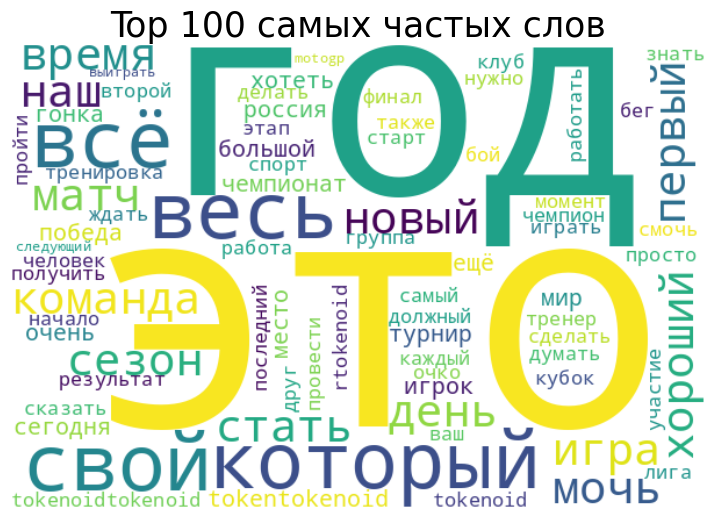

In [ ]:
fig = plt.figure(figsize=(10,5), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 самых частых слов', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

## Условная встречаемость

In [ ]:
from collections import Counter

In [ ]:
def plot_freq(words, freqs, label):
    plt.figure(figsize=(15,4))
    plt.bar(words, freqs)
    plt.xlabel('Слова')
    plt.ylabel('Частота слов')
    plt.title(f'Частоты встречаемости 25 слов для категории {label}', fontsize=20)
    plt.yticks(fontsize=10)
    plt.xticks(rotation=60, fontsize=10)
    plt.show()

In [ ]:
categories = ['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
        'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
        'tennis', 'volleyball', 'winter_sport']

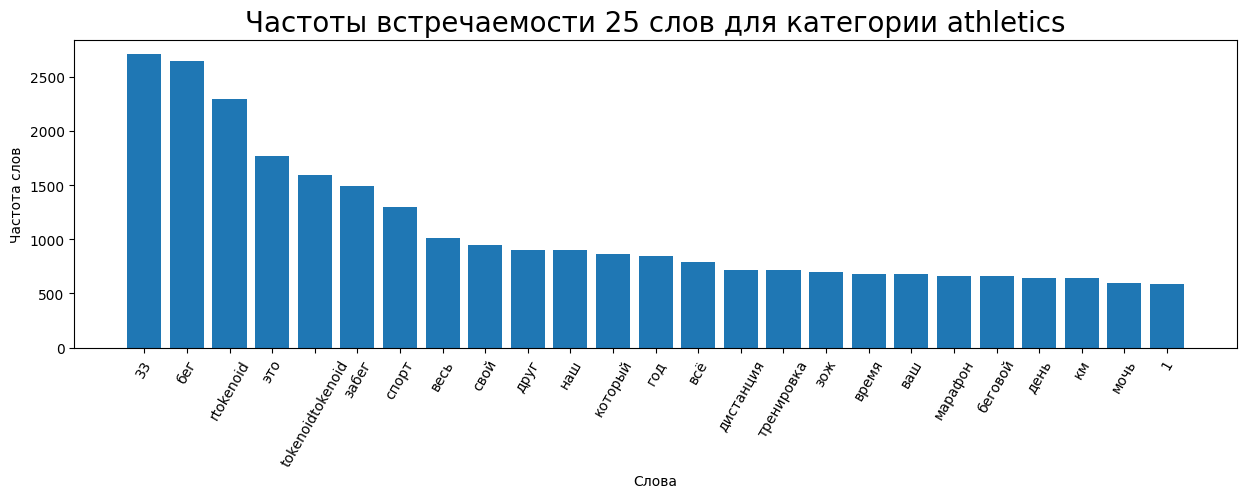

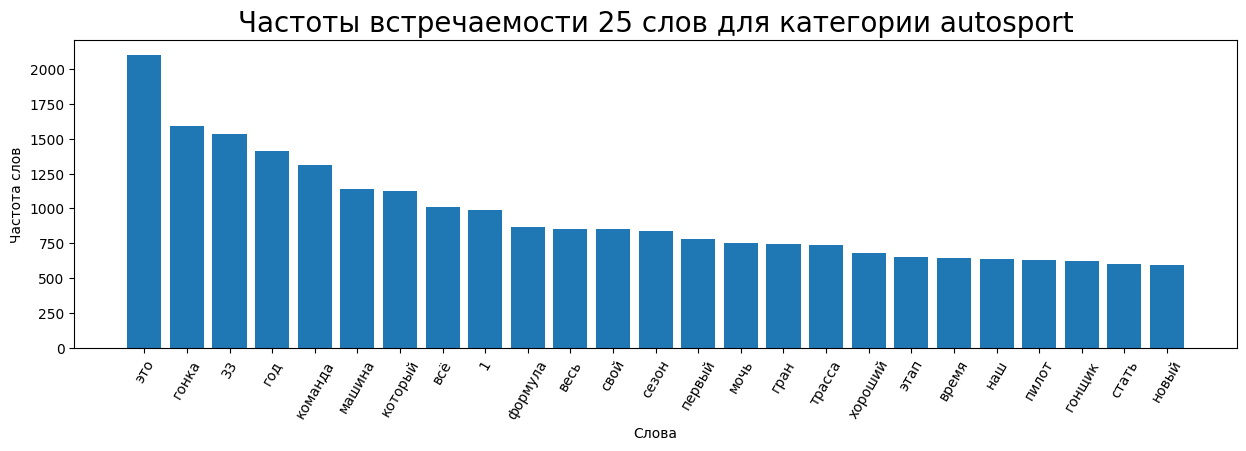

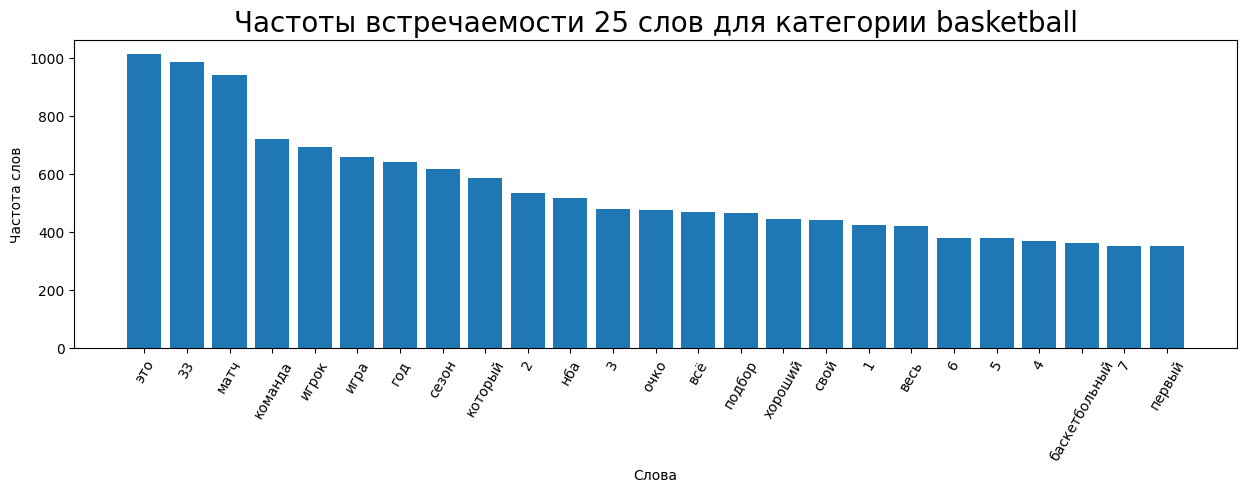

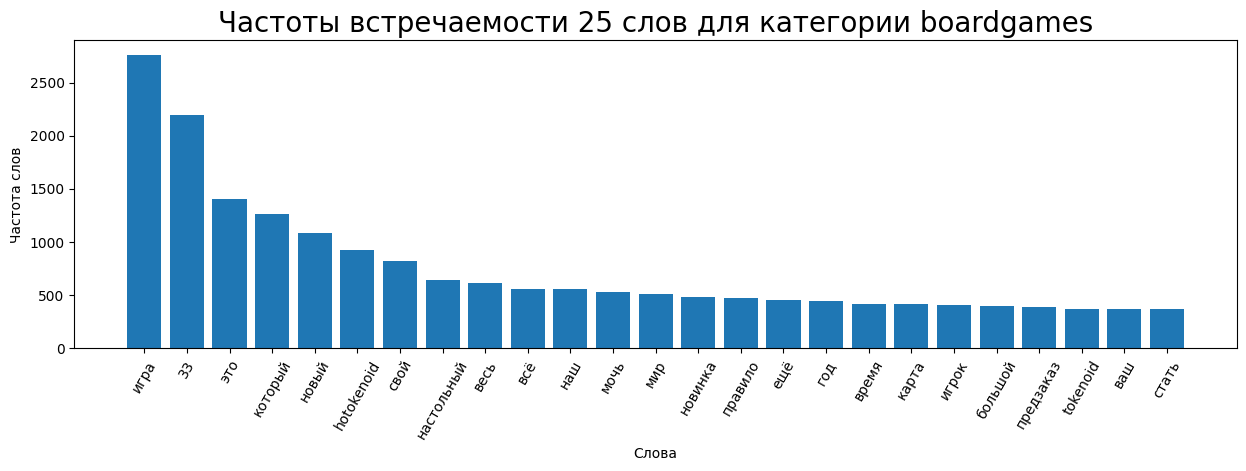

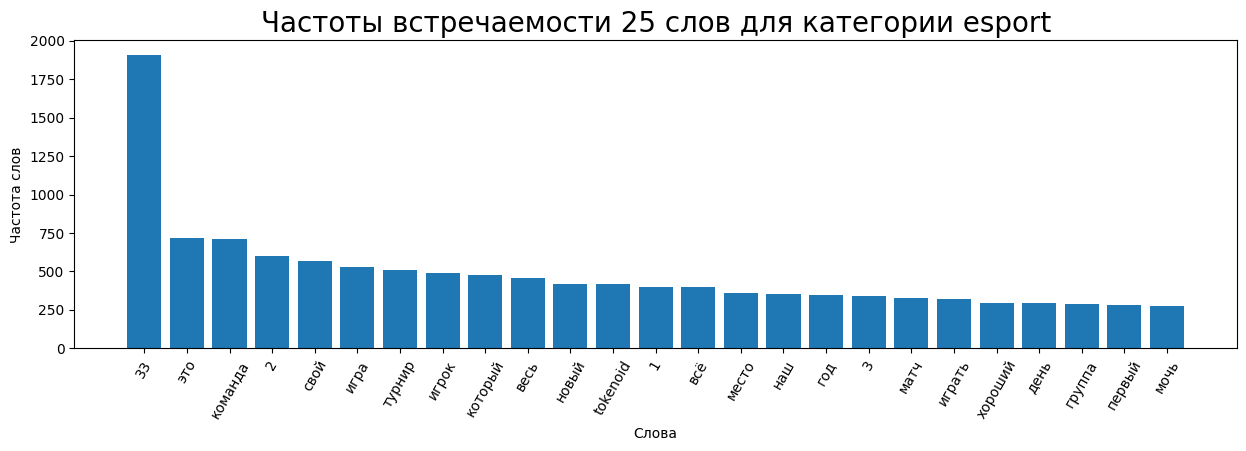

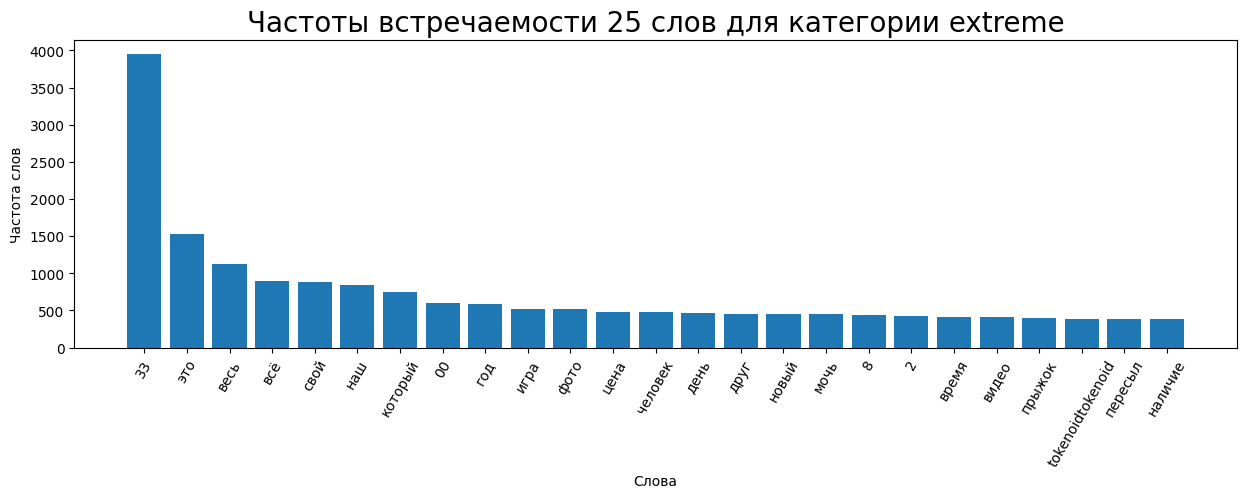

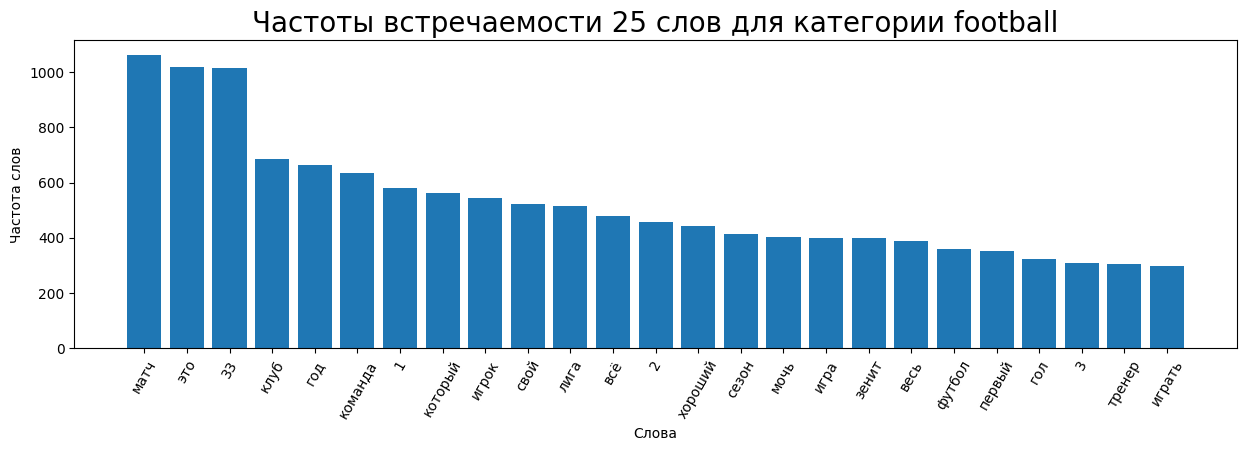

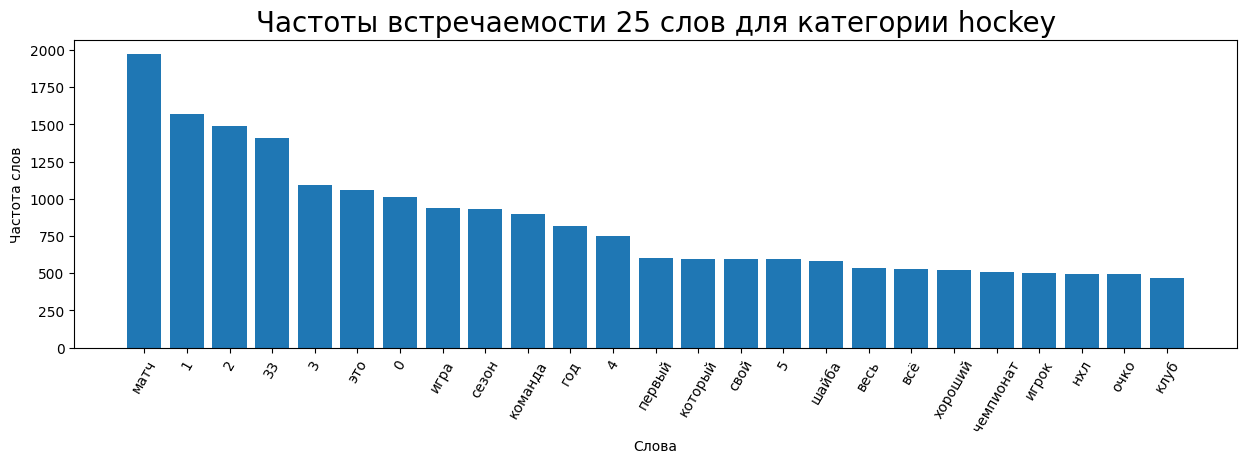

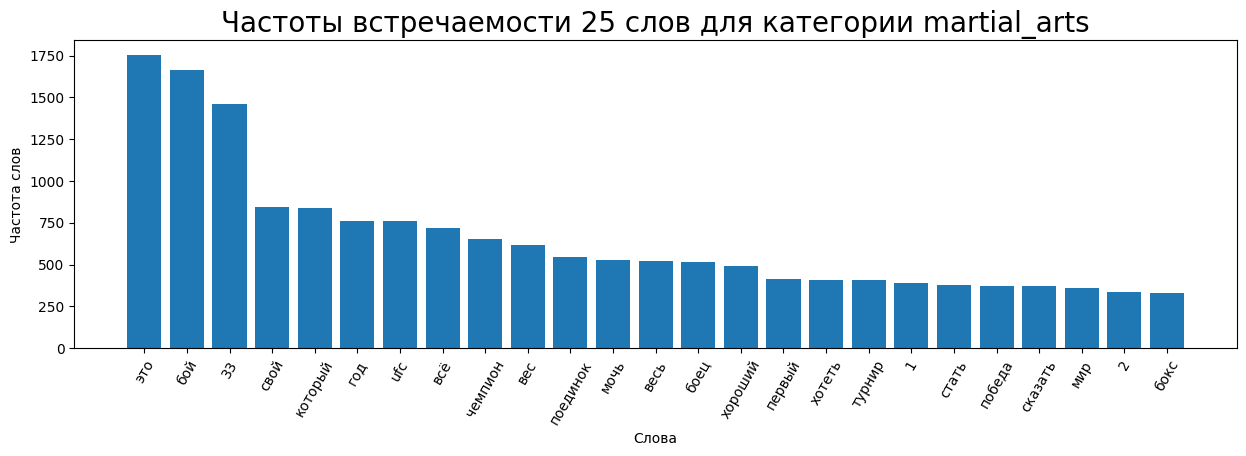

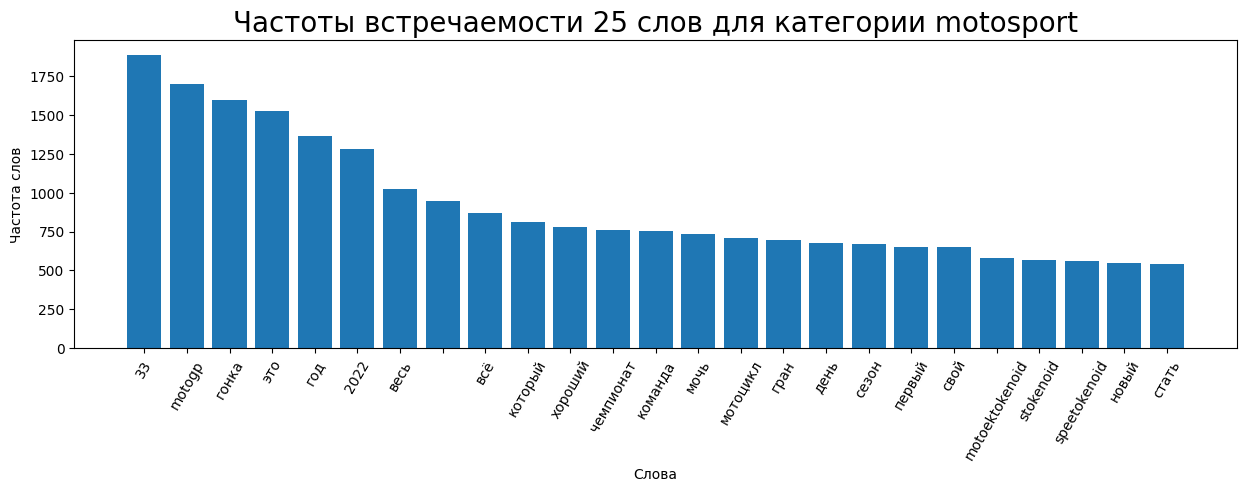

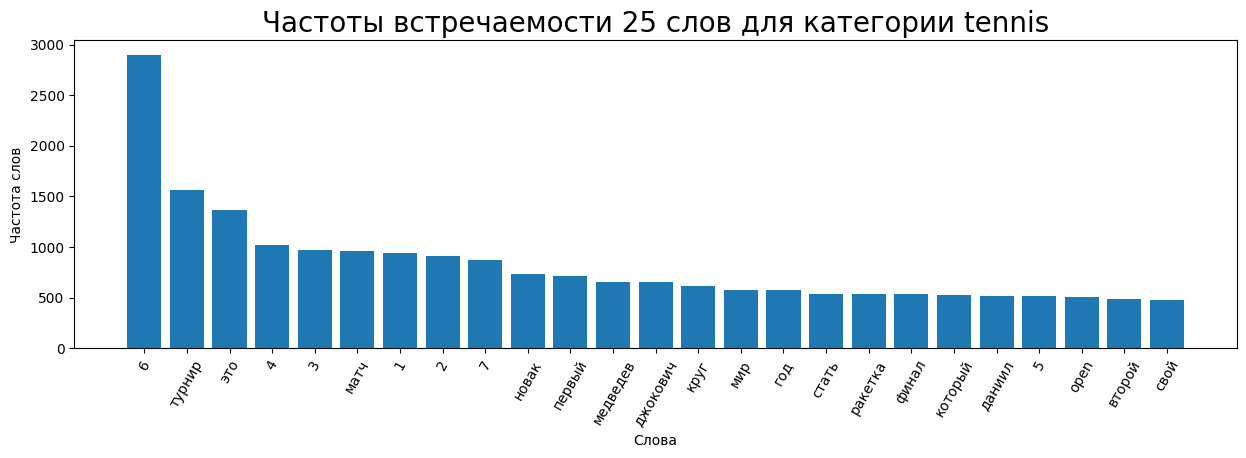

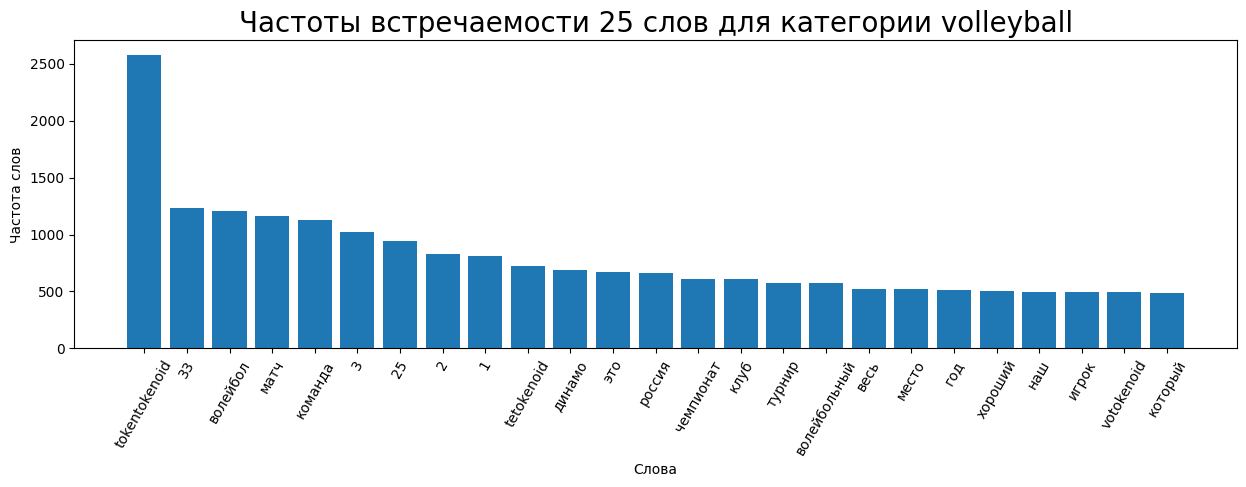

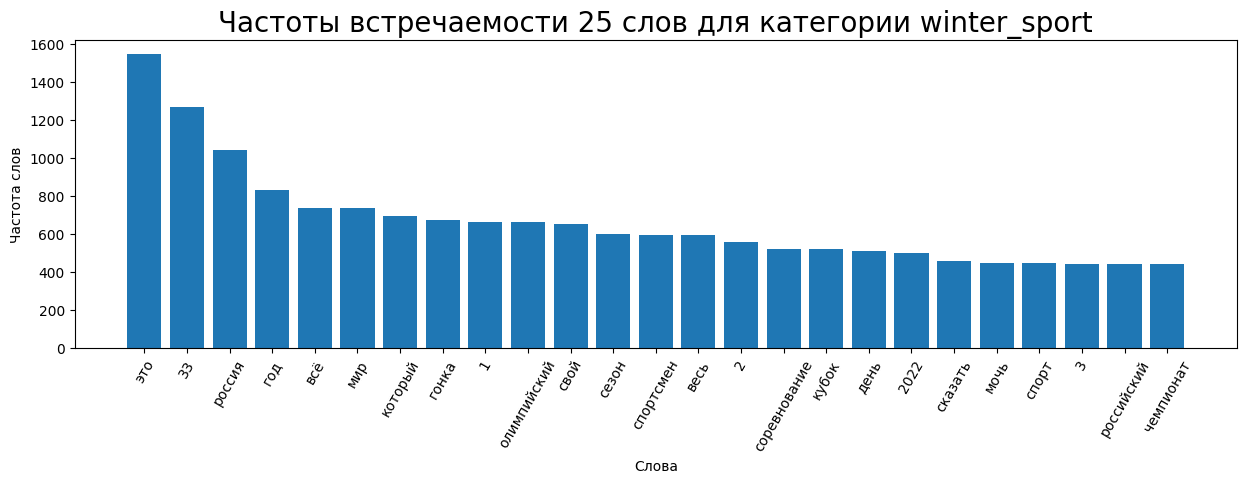

In [ ]:
data['lemmatized_str'] = data['text_remove_stop'].apply(lambda row: ' '.join(row))
group_by = data.groupby('category')['lemmatized_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))

words = [list(zip(*group_by.iloc[i]))[0] for i in range(13)]
freqs = [list(zip(*group_by.iloc[i]))[1] for i in range(13)]

for word, freq, category in zip(words,freqs,  categories):
    plot_freq(words=word, freqs=freq, label=category)

Очень много, где есть слова по типу 33 и это. 33 это вроде как канал спорта

# Обучение модели

## TFIDF model

In [ ]:
from sklearn import feature_extraction

In [ ]:
corpus = data["lemmatized_str"]

In [ ]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2))

In [ ]:
tfidf_vectorizer.fit(corpus)

TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [ ]:
X_train_tfidf = tfidf_vectorizer.transform(corpus)
X_train_tfidf

<38740x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 693918 stored elements in Compressed Sparse Row format>

## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression( max_iter=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, data['category'],
                                                    stratify = data['category'], random_state = 52)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
lr.score(X_train, y_train)

0.7514025124763379

In [ ]:
lr.score(X_test, y_test)

0.6996386164171399

Метрики достаточно неплохие

## Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=7, max_features='sqrt', random_state=52)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, data['category'],
                                                    stratify=data['category'], random_state=52)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=7, n_estimators=200,
                       random_state=52)

In [ ]:
rf.score(X_train, y_train)

0.7620375150576493

In [ ]:
rf.score(X_test, y_test)

0.6560660815694372

Ну тут метрики на валидации похуже получились

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, data['category'],
                                                    stratify=data['category'], random_state=52)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm.score(X_train, y_train)

0.7738082946136637

In [ ]:
svm.score(X_test, y_test)

0.6922044398554466

Тут метрики тоже не плохие

## Оптимизация модели

### Логистическая регрессия

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression(max_iter=500)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=ShuffleSplit(n_splits=5, random_state=52))
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=52, test_size=None, train_size=None),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [ ]:
best_lr_model = grid_search.best_estimator_

In [ ]:
best_lr_model.score(X_train, y_train)

0.7734985372569265

In [ ]:
best_lr_model.score(X_test, y_test)

0.7022199277232835

В общем и целом метрику улучшили, хоть и на чуть-чуть

### Случайный лес

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {
    'n_estimators': np.arange(100, 200, 50),
    'max_depth': np.arange(10, 75, 10),
    'min_samples_split': np.arange(2, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [ ]:
rf = RandomForestClassifier(random_state=52)

In [ ]:
random_search = RandomizedSearchCV(rf, param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=52),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150])})

In [ ]:
best_rf_model = random_search.best_estimator_

In [ ]:
best_rf_model.score(X_train, y_train)

0.8923076923076924

In [ ]:
best_rf_model.score(X_test, y_test)

0.7060402684563758

Тут метрика лучше хоть и на чуть чуть

### SVM

In [ ]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3]
}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'degree': [2, 3],
                         'kernel': ['linear', 'rbf']})

In [ ]:
best_svm = grid_search.best_estimator_

In [ ]:
best_svm.score(X_train, y_train)

0.9187747375666839

In [ ]:
best_svm.score(X_test, y_test)

0.7246257098606091

Ну тут что то похоже на переобучение

## Метрики модели

### Улучшенная логистическая регрессия

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
y_pred = best_lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   athletics       0.84      0.80      0.82       742
   autosport       0.76      0.73      0.74       790
  basketball       0.69      0.67      0.68       712
  boardgames       0.84      0.83      0.84       755
      esport       0.50      0.62      0.55       747
     extreme       0.52      0.60      0.56       778
    football       0.61      0.56      0.58       715
      hockey       0.75      0.68      0.71       738
martial_arts       0.64      0.60      0.62       763
   motosport       0.79      0.78      0.78       758
      tennis       0.89      0.84      0.87       750
  volleyball       0.76      0.71      0.73       737
winter_sport       0.65      0.69      0.67       700

    accuracy                           0.70      9685
   macro avg       0.71      0.70      0.70      9685
weighted avg       0.71      0.70      0.70      9685



В целом метрики для каждого класса так скажем "проходные". Можно отметить esport и extreme, там с метрики все плоховато

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Weighted F1 Score:", f1)
print("Accuracy:", accuracy)

Weighted F1 Score: 0.7049517238811793
Accuracy: 0.7022199277232835


Метрики как и говорилось ранее "проходные" (не супер, но и не плохо)

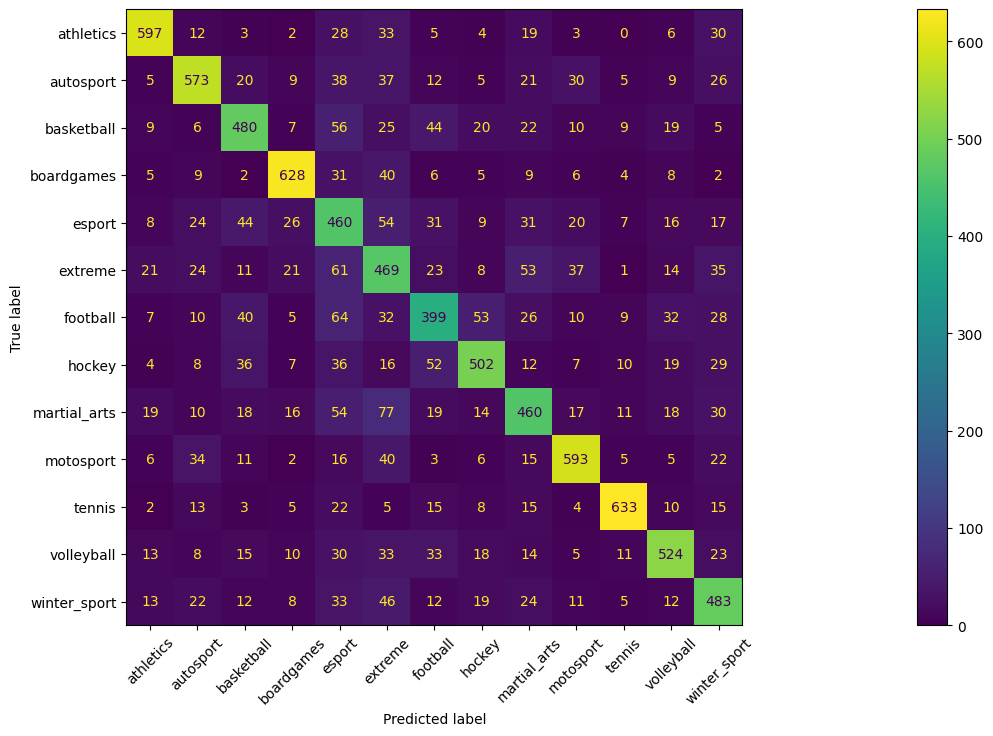

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sorted_labels = sorted(data['category'].unique())
fig, ax = plt.subplots(figsize=(45, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels).plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

Есть проблемные категории:
* martial arts и extreme путаем (боевые исскуства возможно кто то относит к экстриму)
* football и esport путаем (ну если честно киберспорт размытая тема, та же fifa тоже киберспорт, но по смыслу футбол)
* extreme и esport (надо отдельно посмотреть)
* basketball и esport путаем (опять же киберспорт понятие растяжимое)


In [ ]:
X_test_reverted = tfidf_vectorizer.inverse_transform(X_test)
df = pd.DataFrame({
    'X_test_reverted': X_test_reverted,
    'y_test': y_test,
    'y_pred': y_pred
})

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/datasets/sport.csv')
data = data.drop('oid',axis=1)

In [ ]:
# посмотрим какой экстрим мы предсказываем единоборствам
result_df_filtered = df[(df['y_test'] == 'martial_arts') & (df['y_pred'] == 'extreme')]
top5 = result_df_filtered.head(5)
top5

,X_test_reverted,y_test,y_pred
6145,"[tokenoid, нибыть, человек]",martial_arts,extreme
8464,"[33, алексей, друг, мир, новость, новый]",martial_arts,extreme
25140,"[день, мир, мочь, нибыть, пять]",martial_arts,extreme
5703,"[бороться, весь, вид, говорить, действительно,...",martial_arts,extreme
5449,"[автор, бесплатный, давать, деньга, канал, кот...",martial_arts,extreme


Так смотреть не очень удобно и понятно

In [ ]:
comment_indices = top5['X_test_reverted'].index
comments = data.loc[comment_indices]
comments

,category,text
6145,martial_arts,Вtokenoid Добpа. Кто нибудь знаeт ворожейкy to...
8464,martial_arts,Друзья надеваем наушнички и слушаем новый подк...
25140,martial_arts,Как я могу убить кого нибудь если я пять раз в...
5703,martial_arts,Кто ты без своей духовной истории? Пожалуйста ...
5449,martial_arts,ПРИВЕТСТВУЮ Хочу поделиться бесплатным каналом...


In [ ]:
comments['text'][6145]

'Вtokenoid Добpа. Кто нибудь знаeт ворожейкy tokenoid адpec. Быть можeт окажутtokenoid добpыe люди. Будьтe добpы бeз имeни автоpа'

Помотрев на комментарии в целом иногда не сказать, что они вообще относятся к какой то категории. Возможно единаборства как жестокий спорт содержат немного жестокие комментарии, что сходятся с комментариями экстремального спорта

In [ ]:
# посмотрим какой киберспорт мы предсказываем футболу
result_df_filtered = df[(df['y_test'] == 'football') & (df['y_pred'] == 'esport')]
top5 = result_df_filtered.head(5)
comment_indices = top5['X_test_reverted'].index
comments = data.loc[comment_indices]
comments

,category,text
1823,football,60 дней Плюса Мульти в подарок по промокоду MY...
36615,football,Увидела такой стул в ИКЕА. Кто нибудь знает ка...
3457,football,СТАВКА ДНЯ ФОРА 1 20 5 ПО СТАВКЕ ДНЯ У НАС УЖЕ...
6391,football,Суарес рассказал о срыве перехода в Ривер Плей...
2051,football,Жοзe Αндpaде οтчим Κpиштиaну Ποздpaвляю лучшeг...


In [ ]:
comments['text'][1823]

'60 дней Плюса Мульти в подарок по промокоду MYMUSIC 33 Если у вас когда то была подписка Плюс для вас он тоже сработает. Получите тысячи треков аудиокниги и топовые рекомендации которые подойдут именно вам 33'

Не ну тут без комментариев. Каким местом тут футбол....

In [ ]:
# посмотрим какой киберспорт мы предсказываем экстриму
result_df_filtered = df[(df['y_test'] == 'extreme') & (df['y_pred'] == 'esport')]
top5 = result_df_filtered.head(5)
top5['X_test_reverted'][7891]

array(['000', 'tokenoidtokenoid', 'tokentokenoid', 'билет', 'вк', 'дать',
       'ждать', 'карта', 'либо', 'лишь', 'минута', 'нужный', 'оставаться',
       'писать', 'полный', 'течение', 'человек'], dtype='<U29')

In [ ]:
comment_indices = top5['X_test_reverted'].index
comments = data.loc[comment_indices]
comments

,category,text
27656,extreme,Видеоклип на Great Ctokenoid часть 4 – Ntokeno...
7891,extreme,Человек скупает пушкинские карты с балансом от...
27176,extreme,Как вам идея вытачивать доску из цельного куск...
26782,extreme,В нашем телеграм канале проходит конкурс на Ar...
17213,extreme,Видеоклип на Great Ctokenoid часть 4 – Ntokeno...


In [ ]:
comments['text'][7891]

'Человек скупает пушкинские карты с балансом от 5. 000 За полный баланс платит от 2. 200 до 3. 000 т. р 1. Карта остается у вас я лишь покупаю билет на концерт. 2. Нужны только данные карты и код для списания. 3. Карта после оплата в течение 5 минут. Жду вас писать в телеграм tokentokenoid Либо вк tokenoidtokenoid'

Ну тут прям экстрим экстрим

Общие выводы (ниже есть метрики для других моделей, но эта модель была боле менее самой нормальной):
* Категория спорта не всегда направленность комментария, что ухудшает понимание моделью тех или иных комментариев
* Комментарии могут быть по смыслу в одной тематике, но в разных категориях
* Категории esport и exreme трудно определять, как вариант проблема из комментария выше  

# Проверим модели на "поле боя"

In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '@', ';', '/', "''", "",'№','«','»','–']
stop_words = stopwords.words("russian")

def clean_text(text):
    text = text.lower()
    for punctuation_mark in punctuation_marks:
        text = text.replace(punctuation_mark, '')
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

sentences = ["Этот игрок - настоящий талант! Он забил два великолепных гола и привел свою команду к победе.", # подрузамевал football
             "Я был очень впечатлен игрой молодого разыгрывающего. Он был быстр, ловок и набрал решающий трехочковый бросок в конце игры.", # подрузамевал basketball
             "Я был очень рад видеть, как моя любимая команда выиграла The International. Они заслужили это после тяжелого сезона.", # подрузамевал esport
             "Эта сессия D&D была просто невероятной! Мастер игры создал захватывающий мир, и игроки отлично отыграли своих персонажей.", # подрузамевал boardgames
             " Я был очень впечатлен игрой этого фрираннера. Он смог выполнить сложный трюк на крыше здания и приземлиться с идеальной точностью."] # подрузамевал extreme

cleaned_sentences = [clean_text(sentence) for sentence in sentences]
tfidf_vectorized_sentences = tfidf_vectorizer.transform(cleaned_sentences)
predictions = best_lr_model.predict(tfidf_vectorized_sentences)
predictions

array(['esport', 'basketball', 'esport', 'boardgames', 'esport'],
      dtype=object)

Выводы по преобразованиям:
* в целом угадывает категории, которые я подразумевал
* в угаданных категориях, комментарии содержали ключевые слова (International, D&D)
* в первом, как я и говорил ранее тема спорта и киберспорта размыта в некоторых играх, даже человеку трудно определить имел я ввиду Месси, который забивает гол или Игрока, который играл в FIFA и забил гол
* с последним комментарием похожая ситуация

### Улучшенный случайный лес

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Weighted F1 Score:", f1)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

   athletics       0.92      0.81      0.86       742
   autosport       0.85      0.75      0.80       790
  basketball       0.81      0.63      0.71       712
  boardgames       0.84      0.83      0.84       755
      esport       0.35      0.64      0.45       747
     extreme       0.46      0.69      0.55       778
    football       0.62      0.57      0.59       715
      hockey       0.78      0.68      0.73       738
martial_arts       0.71      0.58      0.64       763
   motosport       0.92      0.77      0.84       758
      tennis       0.85      0.85      0.85       750
  volleyball       0.90      0.70      0.78       737
winter_sport       0.74      0.67      0.71       700

    accuracy                           0.71      9685
   macro avg       0.75      0.71      0.72      9685
weighted avg       0.75      0.71      0.72      9685

Weighted F1 Score: 0.719106036240881
Accuracy: 0.7060402684563758


В целом метрики для каждого класса так скажем "проходные". Можно отметить esport и extreme, тут с метрики похуже

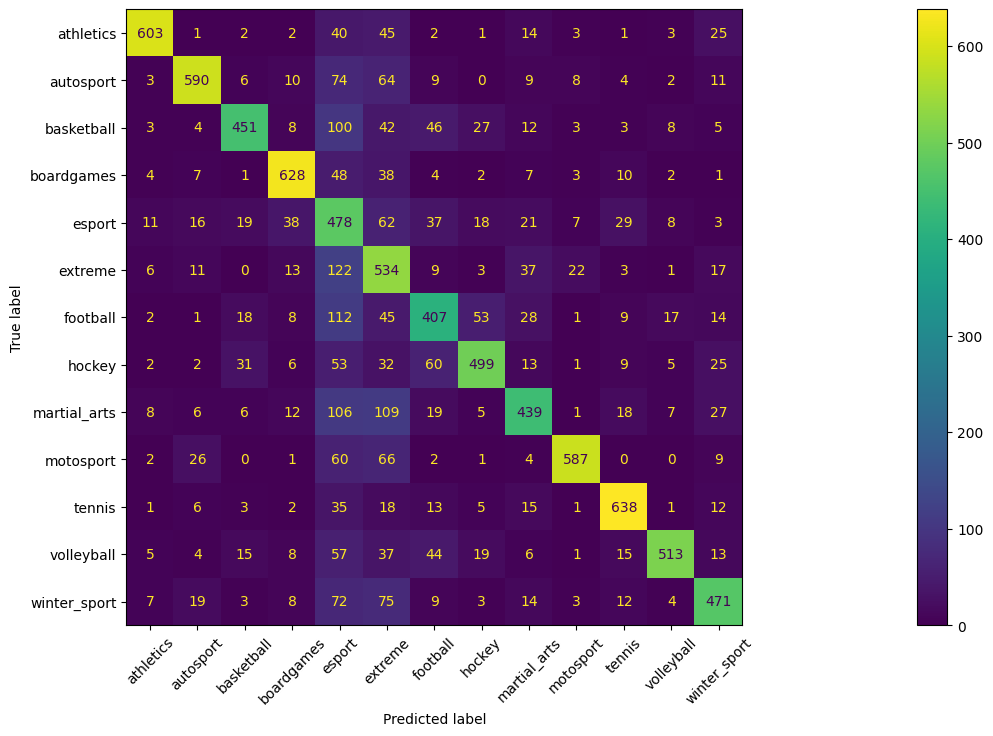

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sorted_labels = sorted(data['category'].unique())
fig, ax = plt.subplots(figsize=(45, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels).plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

Тут прям видно, что модель плохо определяет esport и extreme и проблемные категории увеличились:
* martial arts и extreme путаем (боевые исскуства возможно кто то относит к экстриму)
* martial arts и esport путаем (опять размытость киберспорта...)
* football и esport путаем (снова)
* extreme и esport (снова)
* basketball и esport путаем

### Улучшенный SVM

In [ ]:
y_pred = best_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Weighted F1 Score:", f1)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

   athletics       0.93      0.82      0.87       742
   autosport       0.80      0.74      0.77       790
  basketball       0.72      0.67      0.69       712
  boardgames       0.90      0.85      0.88       755
      esport       0.49      0.67      0.57       747
     extreme       0.50      0.70      0.58       778
    football       0.62      0.59      0.61       715
      hockey       0.79      0.67      0.73       738
martial_arts       0.64      0.63      0.64       763
   motosport       0.86      0.79      0.82       758
      tennis       0.94      0.83      0.88       750
  volleyball       0.85      0.73      0.78       737
winter_sport       0.66      0.72      0.69       700

    accuracy                           0.72      9685
   macro avg       0.75      0.72      0.73      9685
weighted avg       0.75      0.72      0.73      9685

Weighted F1 Score: 0.7312793854483732
Accuracy: 0.7246257098606091


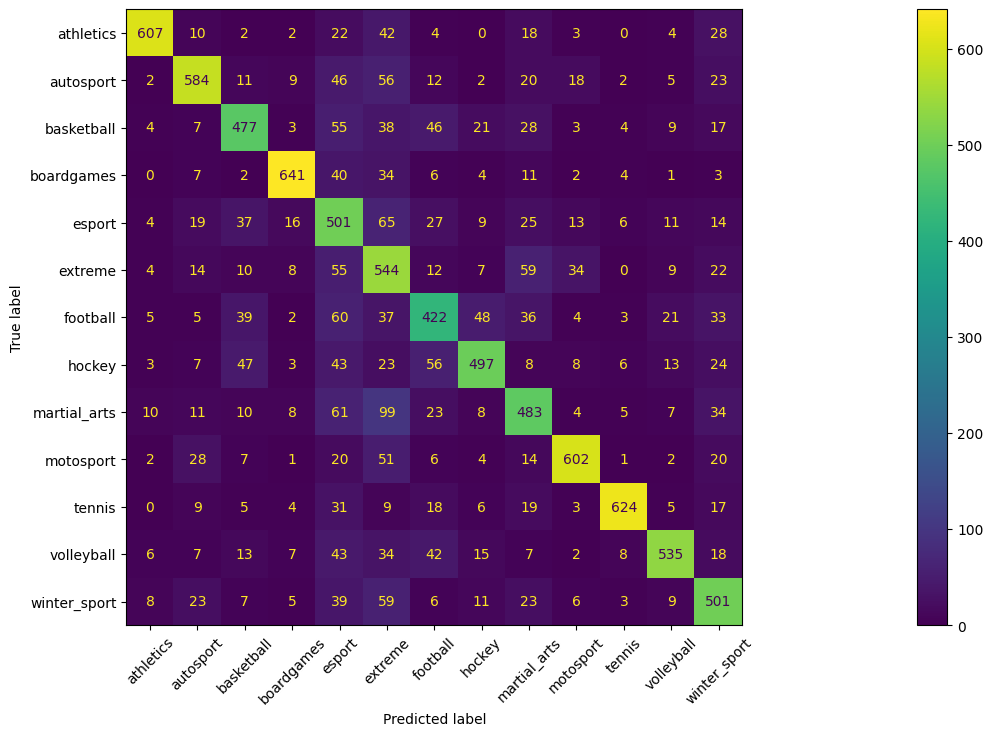

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sorted_labels = sorted(data['category'].unique())
fig, ax = plt.subplots(figsize=(45, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels).plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

Общий вывод:
*
*
*

Решил взять лучшую модель по метрикам и проверить на ней новые данные